# Data Wrangling & Cleaning

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load & Merge the data

In [2]:
df_listing = pd.read_csv('data/kc_house_data.csv')
df_walking_score = pd.read_csv('data/walking_score.csv')
df_income = pd.read_csv('data/ZIP-3.csv')

### Summarizing your data for inspection

In [3]:
print('Listings')
print(df_listing.columns)
print(df_listing.head())
print(df_listing.describe())
print('')
print('Walking Score')
# TODO: print the columns, head and describe for the Walking Score dataframe
print(df_walking_score.columns)
print(df_walking_score.head())
print(df_walking_score.describe())
print('')
print('Income')
# TODO: print the columns, head and describe for the Income dataframe
print(df_income.columns)
print(df_income.head())
print(df_income.describe())

Listings
Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650    1.00           0     0     ...          7        1180   
1      7242    2.00           0     0     ...          7     

### Fixing column name

In [4]:
df_income.columns = ['zipcode', 'median_income', 'mean_income', 'population']

### Converting data types

In [5]:
df_listing['date'] = pd.to_datetime(df_listing['date'])
df_income['median_income'] = df_income['median_income'].str.replace(',', '').astype(float)
df_income['mean_income'] = df_income['mean_income'].str.replace(',', '').astype(float)
df_income.head()

,zipcode,median_income,mean_income,population
0,1001,56663.00,66688.00,"16,445"
1,1002,49853.00,75063.00,"28,069"
2,1003,28462.00,35121.00,"8,491"
3,1005,75423.00,82442.00,"4,798"
4,1007,79076.00,85802.00,"12,962"


In [6]:
# TODO: Convert the data type of the population column
df_income['population'] = df_income['population'].str.replace(',', '').astype(int)
df_income.head()

,zipcode,median_income,mean_income,population
0,1001,56663.00,66688.00,16445
1,1002,49853.00,75063.00,28069
2,1003,28462.00,35121.00,8491
3,1005,75423.00,82442.00,4798
4,1007,79076.00,85802.00,12962


### Dealing with missing values
How to deal with the missing values? Should we remove the rows or fill the gap with a value?

In [7]:
# Number of missing values by columns
print(df_listing.isnull().sum())
print('')
print(df_walking_score.isnull().sum())
print('')
print(df_income.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

zipcode           0
walking_score     0
transit_score    16
bike_score       45
dtype: int64

zipcode          0
median_income    0
mean_income      7
population       0
dtype: int64


In [8]:
# select all the rows with missing values
df_walking_score[df_walking_score.isnull().any(axis=1)]

,zipcode,walking_score,transit_score,bike_score
0,98019,0,nan,nan
1,98045,0,nan,nan
2,98065,0,nan,nan
3,98022,0,nan,nan
4,98092,0,0.00,nan
5,98027,0,0.00,nan
6,98014,1,nan,nan
7,98038,2,nan,nan
8,98039,2,nan,nan
9,98029,2,24.00,nan


In [9]:
# select all the rows with missing values
df_income[df_income.isnull().any(axis=1)]

,zipcode,median_income,mean_income,population
7055,23909,2499.00,nan,2027
26131,76596,57014.00,nan,1274
26132,76597,57014.00,nan,2882
26133,76598,57014.00,nan,523
26200,76798,32500.00,nan,1862
29644,90073,2499.00,nan,539
29979,92135,127639.00,nan,571


In [10]:
# TODO: Create a strategy to handle the missing values on the Walking Score and Income dataframes
df_income['mean_income'] = df_income['mean_income'].fillna(df_income['median_income'])

### Removing outliers
Some algorithms are very sensitive to outliers. Considering the number of bedrooms, should we remove houses with an extreme number of bedrooms? How many bedrooms are too many? (Suggestion: as a rule of thumb, three standard deviations from the mean is a good measure to identify outliers).

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
('mean', 3.37084162309721)
('std', 0.9300403146391227)


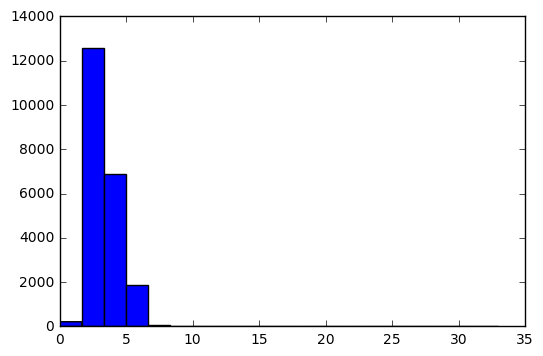

In [11]:
# bedrooms
print(df_listing['bedrooms'].value_counts())
print('mean', np.mean(df_listing['bedrooms']))
print('std', np.std(df_listing['bedrooms']))
plt.hist(df_listing['bedrooms'], bins=20)
plt.show()

In [12]:
# TODO: Remove the outlier houses considering the number of bedrooms
mean_bedrooms = np.mean(df_listing['bedrooms'])
std_bedrooms = np.std(df_listing['bedrooms'])
df_listing = df_listing[(df_listing['bedrooms']>mean_bedrooms-3*std_bedrooms)&(df_listing['bedrooms']<mean_bedrooms+3*std_bedrooms)]

In [13]:
# Dealing with outliers
houses_to_remove = []

# remove based on zipcode and price
for zipcode in df_listing['zipcode'].unique():
    df_zipcode = df_listing[df_listing['zipcode']==zipcode]
    m = np.mean(df_zipcode['price'])
    s = np.std(df_zipcode['price'])
    houses_to_remove = houses_to_remove + list(df_zipcode[df_zipcode['price']>m+3.0*s].index)
print('')
print('# houses to remove', len(houses_to_remove))

df_listing = df_listing[~df_listing.index.isin(houses_to_remove)]


('# houses to remove', 373)


### Merging Data Sets

In [14]:
df_merge = df_listing.copy()
df_merge = df_merge.merge(df_walking_score, on='zipcode', how='left')
df_merge = df_merge.merge(df_income, on='zipcode', how='left')

In [15]:
print('Total # houses', len(df_merge))

('Total # houses', 21165)


### Saving the processed file

In [16]:
df_merge.to_csv('data/house_pricing.csv', index=False)